In [1]:
import pandas as pd
import folium
import json
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import numpy as np

In [2]:
df_alcool = pd.read_csv('dados/alcool.csv')

In [3]:
df_alcool.head()

id  UF  Esperança de vida ao nascer (Anos)  Situação Censitária  Área  \
0   0  RO                               71.91                    1     1   
1   9  RO                               71.91                    1     1   
2  10  RO                               71.91                    1     1   
3  18  RO                               71.91                    1     1   
4  19  RO                               71.91                    1     1   

   Peso Final  Altura Final  Está grávida?  \
0        60.0         145.0            2.0   
1        65.0         152.0            2.0   
2        77.0         155.0            2.0   
3        56.0         159.0            2.0   
4        55.0         176.0            2.0   

   Em geral, no dia que bebe, quantas doses de bebida alcoólica consome?  \
0                                                5.0                       
1                                                5.0                       
2                                                1.0                       
3                                                NaN                       
4                                                NaN                       

   Nos últimos doze meses, quando consumiu bebida alcoólica, dirigiu logo depois de beber?  \
0                                                NaN                                         
1                                                2.0                                         
2                                                NaN                                         
3                                                NaN                                         
4                                                NaN                                         

   Nos últimos doze meses, quantas vezes deixou de fazer obrigações porque bebeu demais?  \
0                                                1.0                                       
1                                                2.0                                       
2                                                1.0                                       
3                                                NaN                                       
4                                                NaN                                       

   Nos últimos doze meses, quantas vezes, após ter bebido, não conseguiu lembrar o que aconteceu?  \
0                                                1.0                                                
1                                                1.0                                                
2                                                1.0                                                
3                                                NaN                                                
4                                                NaN                                                

   Nos últimos doze meses, algum parente, amigo ou profissional de saúde disse que você estava bebendo demais ou para você parar de beber?  \
0                                                1.0                                                                                         
1                                                3.0                                                                                         
2                                                1.0                                                                                         
3                                                NaN                                                                                         
4                                                NaN                                                                                         

   dias_semana_alcool  
0                 NaN  
1                 NaN  
2                 7.0  
3                 NaN  
4                 NaN

In [4]:
df_alcool.shape

(90846, 14)

In [5]:
df_alcool.columns

Index(['id', 'UF', 'Esperança de vida ao nascer (Anos)', 'Situação Censitária',
       'Área', 'Peso Final', 'Altura Final', 'Está grávida?',
       'Em geral, no dia que bebe, quantas doses de bebida alcoólica consome?',
       'Nos últimos doze meses, quando consumiu bebida alcoólica, dirigiu logo depois de beber?',
       'Nos últimos doze meses, quantas vezes deixou de fazer obrigações porque bebeu demais?',
       'Nos últimos doze meses, quantas vezes, após ter bebido, não conseguiu lembrar o que aconteceu?',
       'Nos últimos doze meses, algum parente, amigo ou profissional de saúde disse que você estava bebendo demais ou para você parar de beber?',
       'dias_semana_alcool'],
      dtype='object')

In [6]:
df_alcool = df_alcool.drop(columns = ['Está grávida?', 'Nos últimos doze meses, quantas vezes deixou de fazer obrigações porque bebeu demais?', 'Nos últimos doze meses, quantas vezes, após ter bebido, não conseguiu lembrar o que aconteceu?'])

In [7]:
df_corr = df_alcool.drop(columns = ['UF'])

In [8]:
df_corr['Situação Censitária'] = df_corr['Situação Censitária'].replace({1: 'Urbano', 2: 'Rural'})
df_corr['Nos últimos doze meses, quando consumiu bebida alcoólica, dirigiu logo depois de beber?'] = df_corr['Nos últimos doze meses, quando consumiu bebida alcoólica, dirigiu logo depois de beber?'].replace({1: 'Sim', 2: 'Não'})
df_corr['Nos últimos doze meses, algum parente, amigo ou profissional de saúde disse que você estava bebendo demais ou para você parar de beber?'] = df_corr['Nos últimos doze meses, algum parente, amigo ou profissional de saúde disse que você estava bebendo demais ou para você parar de beber?'].replace({1: 'Não', 2: 'Sim, em uma ocasião', 3: 'Sim, em mais de uma ocasião'})

df_dummies1 = pd.get_dummies(df_corr['Situação Censitária'])
df_dummies2 = pd.get_dummies(df_corr['Nos últimos doze meses, quando consumiu bebida alcoólica, dirigiu logo depois de beber?'], prefix='dirigiu_apos_beber')
df_dummies3 = pd.get_dummies(df_corr['Nos últimos doze meses, algum parente, amigo ou profissional de saúde disse que você estava bebendo demais ou para você parar de beber?'], prefix='alertou_frequencia')

df_dummies = pd.concat([df_corr, df_dummies1], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies2], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies3], axis=1)

df_dummies.drop(columns = ['Situação Censitária', 'Nos últimos doze meses, quando consumiu bebida alcoólica, dirigiu logo depois de beber?', 'Nos últimos doze meses, algum parente, amigo ou profissional de saúde disse que você estava bebendo demais ou para você parar de beber?'], inplace = True)

df_dummies


id  Esperança de vida ao nascer (Anos)  Área  Peso Final  \
0           0                               71.91     1        60.0   
1           9                               71.91     1        65.0   
2          10                               71.91     1        77.0   
3          18                               71.91     1        56.0   
4          19                               71.91     1        55.0   
...       ...                                 ...   ...         ...   
90841  293709                               78.85     1        63.0   
90842  293712                               78.85     1        72.0   
90843  293713                               78.85     1        87.0   
90844  293718                               78.85     1        89.0   
90845  293720                               78.85     1        62.0   

       Altura Final  \
0             145.0   
1             152.0   
2             155.0   
3             159.0   
4             176.0   
...             ...   
90841         168.0   
90842         168.0   
90843         163.0   
90844         168.0   
90845         186.0   

       Em geral, no dia que bebe, quantas doses de bebida alcoólica consome?  \
0                                                    5.0                       
1                                                    5.0                       
2                                                    1.0                       
3                                                    NaN                       
4                                                    NaN                       
...                                                  ...                       
90841                                                3.0                       
90842                                               12.0                       
90843                                                NaN                       
90844                                                NaN                       
90845                                               12.0                       

       dias_semana_alcool  Rural  Urbano  dirigiu_apos_beber_Não  \
0                     NaN      0       1                       0   
1                     NaN      0       1                       1   
2                     7.0      0       1                       0   
3                     NaN      0       1                       0   
4                     NaN      0       1                       0   
...                   ...    ...     ...                     ...   
90841                 1.0      1       0                       0   
90842                 2.0      1       0                       1   
90843                 NaN      1       0                       0   
90844                 NaN      1       0                       0   
90845                 2.0      1       0                       0   

       dirigiu_apos_beber_Sim  alertou_frequencia_Não  \
0                           0                       1   
1                           0                       0   
2                           0                       1   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
90841                       0                       1   
90842                       0                       0   
90843                       0                       0   
90844                       0                       0   
90845                       1                       1   

       alertou_frequencia_Sim, em mais de uma ocasião  \
0                                                   0   
1                                                   1   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
90841              

In [9]:
df_dummies.to_csv('bases_agrupadas/alcool.csv')

<Axes: >

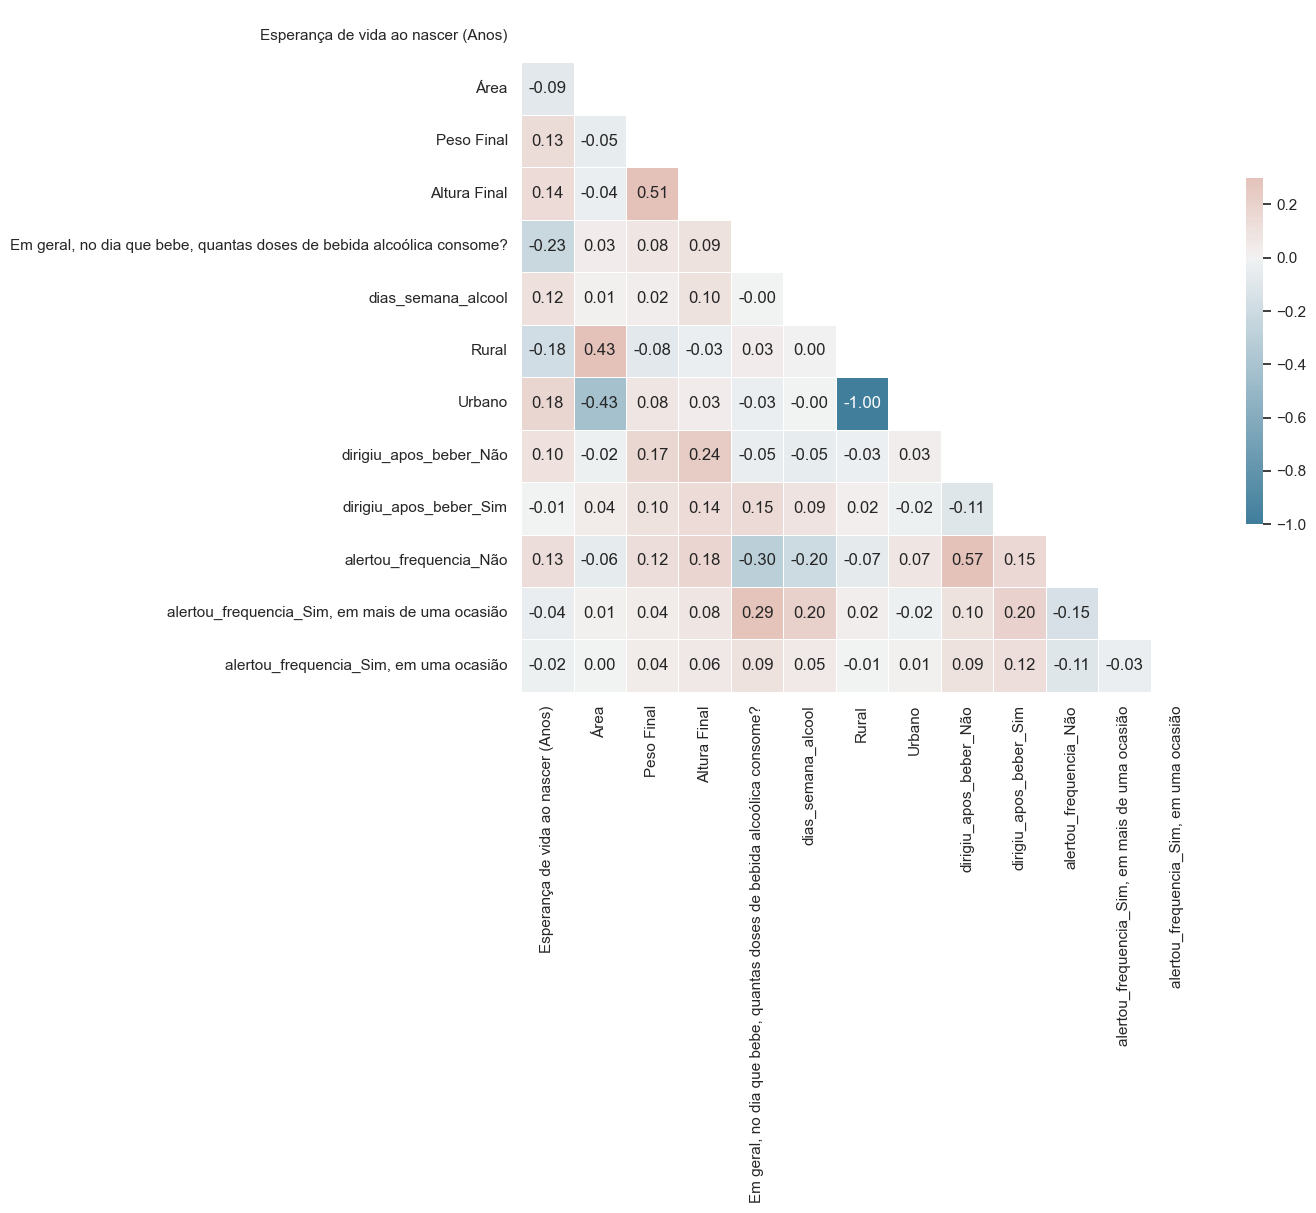

In [10]:
sns.set_theme(style="white")

df_dummies.drop(columns = ['id'], inplace = True)
 
# Compute the correlation matrix
corr = df_dummies.corr()
 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

In [44]:
doses_uf = df_alcool.groupby('UF')['Em geral, no dia que bebe, quantas doses de bebida alcoólica consome?'].mean().reset_index()
doses_uf

UF  Em geral, no dia que bebe, quantas doses de bebida alcoólica consome?
0   AC                                           7.568792                    
1   AL                                           5.421478                    
2   AM                                           6.247959                    
3   AP                                           7.079855                    
4   BA                                           5.140560                    
5   CE                                           5.560092                    
6   DF                                           4.625977                    
7   ES                                           3.854637                    
8   GO                                           4.888688                    
9   MA                                           6.247803                    
10  MG                                           3.683304                    
11  MS                                           4.385833                    
12  MT                                           5.153539                    
13  PA                                           6.424581                    
14  PB                                           5.662100                    
15  PE                                           4.833680                    
16  PI                                           5.028459                    
17  PR                                           3.000000                    
18  RJ                                           4.214535                    
19  RN                                           6.144135                    
20  RO                                           4.839635                    
21  RR                                           7.247821                    
22  RS                                           2.596410                    
23  SC                                           2.963170                    
24  SE                                           6.359331                    
25  SP                                           3.409042                    
26  TO                                           5.892562

In [45]:
dirigir_uf = df_alcool.groupby(['UF', 'Nos últimos doze meses, quando consumiu bebida alcoólica, dirigiu logo depois de beber?']).size().unstack(fill_value=0)
dirigir_uf

Nos últimos doze meses, quando consumiu bebida alcoólica, dirigiu logo depois de beber?  1.0  \
UF                                                                                             
AC                                                                                        45   
AL                                                                                        59   
AM                                                                                        97   
AP                                                                                        43   
BA                                                                                       154   
CE                                                                                       184   
DF                                                                                        96   
ES                                                                                       143   
GO                                                                                       138   
MA                                                                                       286   
MG                                                                                       228   
MS                                                                                       196   
MT                                                                                       168   
PA                                                                                       164   
PB                                                                                       173   
PE                                                                                       110   
PI                                                                                       181   
PR                                                                                       181   
RJ                                                                                       111   
RN                                                                                       117   
RO                                                                                       108   
RR                                                                                       127   
RS                                                                                       156   
SC                                                                                       219   
SE                                                                                       147   
SP                                                                                       260   
TO                                                                                       154   

Nos últimos doze meses, quando consumiu bebida alcoólica, dirigiu logo depois de beber?   2.0  
UF                                                                                             
AC                                                                                        311  
AL                                                                                        365  
AM                                                                                        399  
AP                                                                                        199  
BA                                                                                        613  
CE                                                                                        587  
DF                                                                                        598  
ES                                                                                        858  
GO                                                                                        635  
MA                                                                                        743  
MG                                                             

In [46]:
dirigir_uf.to_csv('dados_qgis/dirigir_uf.csv', index = True)

In [47]:
bebendo_demais_uf = df_alcool.groupby(['UF', 'Nos últimos doze meses, algum parente, amigo ou profissional de saúde disse que você estava bebendo demais ou para você parar de beber?']).size().unstack(fill_value=0)
bebendo_demais_uf

Nos últimos doze meses, algum parente, amigo ou profissional de saúde disse que você estava bebendo demais ou para você parar de beber?   1.0  \
UF                                                                                                                                              
AC                                                                                                                                        471   
AL                                                                                                                                        672   
AM                                                                                                                                        728   
AP                                                                                                                                        424   
BA                                                                                                                                       1320   
CE                                                                                                                                        945   
DF                                                                                                                                        874   
ES                                                                                                                                       1376   
GO                                                                                                                                        910   
MA                                                                                                                                       1281   
MG                                                                                                                                       1890   
MS                                                                                                                                       1161   
MT                                                                                                                                        803   
PA                                                                                                                                        917   
PB                                                                                                                                        835   
PE                                                                                                                                       1105   
PI                                                                                                                                        786   
PR                                                                                                                                       1502   
RJ                                                                                                                                       1746   
RN                                                                                                                                        727   
RO                                                                                                                                        586   
RR                                                                                                                                        614   
RS                                                                                                                                       1810   
SC                                                                                                                                       1648   
SE                                                                                                                                        797   
SP                                                                                   

In [48]:
bebendo_demais_uf.to_csv('dados_qgis/bebendo_demais_uf.csv', index = True)

In [49]:
bebida_uf = df_alcool.groupby('UF')['dias_semana_alcool'].mean().reset_index()
bebida_uf

UF  dias_semana_alcool
0   AC            1.548128
1   AL            1.544803
2   AM            1.483636
3   AP            1.525714
4   BA            1.867057
5   CE            1.579088
6   DF            1.692828
7   ES            1.949495
8   GO            1.905013
9   MA            1.529774
10  MG            2.224047
11  MS            2.040315
12  MT            1.962079
13  PA            1.495449
14  PB            1.690000
15  PE            1.701944
16  PI            1.503864
17  PR            2.067937
18  RJ            2.041294
19  RN            1.640502
20  RO            1.781633
21  RR            1.576998
22  RS            1.921106
23  SC            2.142746
24  SE            1.583026
25  SP            2.179475
26  TO            1.830867

In [50]:
import folium
import json
import pandas as pd

# Carregar o geojson das UFs
with open(r'dados\uf.json', encoding='ISO-8859-1') as f:
    geojson_data = json.load(f)

# Criar o mapa base
m = folium.Map(location=(-14.2350, -51.9253), zoom_start=4, tiles='Cartodb Positron')

# Adicionar o primeiro Choropleth (doses de bebida alcoólica) diretamente no mapa
choropleth1 = folium.Choropleth(
    geo_data=geojson_data,
    data=doses_uf,
    columns=['UF', 'Em geral, no dia que bebe, quantas doses de bebida alcoólica consome?'],
    key_on='feature.properties.UF_05',
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Média de Doses de Bebida Alcoólica por Dia',
    name='Doses de Bebida Alcoólica'
).add_to(m)

# Adicionar o segundo Choropleth (frequência semanal de consumo de álcool) diretamente no mapa, mas sem exibi-lo inicialmente
choropleth2 = folium.Choropleth(
    geo_data=geojson_data,
    data=bebida_uf,
    columns=['UF', 'dias_semana_alcool'],
    key_on='feature.properties.UF_05',
    fill_color='Purples',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Média de Dias de Consumo de Álcool por Semana',
    name='Frequência Semanal de Consumo de Álcool'
).add_to(m)

# Adicionar o controle de camadas para alternar entre as camadas
folium.LayerControl(collapsed=True).add_to(m)

# Salvar o mapa em um arquivo HTML
# m.save('mapa_com_camadas_coropletico.html')

# Exibir o mapa
m
